In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data_set = pd.read_csv('California Wildfire Damage.csv')

<h1>Data set<h1>

In [3]:
data_set


,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
95,INC1095,2018-01-16,Mendocino County,13112,1468,46,281,89,17,4008.58,Human Activity
96,INC1096,2022-07-07,Shasta County,39209,710,282,189,34,14,376.72,Human Activity
97,INC1097,2016-05-18,Shasta County,11863,702,9,40,100,1,1474.78,Human Activity
98,INC1098,2014-06-24,Napa Valley,1338,1619,262,293,94,3,3308.74,Human Activity


<h1>Data cleaning<h1>

In [4]:
data_set.isnull().sum()

Incident_ID                             0
Date                                    0
Location                                0
Area_Burned (Acres)                     0
Homes_Destroyed                         0
Businesses_Destroyed                    0
Vehicles_Damaged                        0
Injuries                                0
Fatalities                              0
Estimated_Financial_Loss (Million $)    0
Cause                                   0
dtype: int64

In [5]:
data_set.isna().sum()

Incident_ID                             0
Date                                    0
Location                                0
Area_Burned (Acres)                     0
Homes_Destroyed                         0
Businesses_Destroyed                    0
Vehicles_Damaged                        0
Injuries                                0
Fatalities                              0
Estimated_Financial_Loss (Million $)    0
Cause                                   0
dtype: int64

In [6]:
data_set.duplicated().sum()

np.int64(0)

<h1>Transforming data and Converting types<h1>

In [7]:
data_set.dtypes

Incident_ID                              object
Date                                     object
Location                                 object
Area_Burned (Acres)                       int64
Homes_Destroyed                           int64
Businesses_Destroyed                      int64
Vehicles_Damaged                          int64
Injuries                                  int64
Fatalities                                int64
Estimated_Financial_Loss (Million $)    float64
Cause                                    object
dtype: object

In [8]:
data_set['Date'] = data_set['Date'].astype(str)


In [9]:
# Dividir a coluna 'Date' em novas colunas
data_set[['Year', 'Month', 'Day']] = data_set['Date'].str.split('-', expand=True)
data_set['Year'] = data_set['Year'].astype(int)
data_set = data_set.sort_values('Year')

In [10]:
data_set

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause,Year,Month,Day
28,INC1028,2014-06-03,Butte County,17860,1819,391,45,20,15,1975.26,Unknown,2014,06,03
17,INC1017,2014-04-16,Sonoma County,25094,1014,288,269,30,12,268.91,Human Activity,2014,04,16
61,INC1061,2014-03-28,Los Angeles County,11162,544,223,196,100,8,85.57,Unknown,2014,03,28
47,INC1047,2014-05-16,San Diego County,28661,276,313,89,7,10,3485.12,Unknown,2014,05,16
42,INC1042,2014-09-08,San Diego County,6651,1559,43,102,13,5,2024.82,Human Activity,2014,09,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,INC1078,2023-02-08,Napa Valley,45821,763,371,145,80,6,52.59,Human Activity,2023,02,08
88,INC1088,2023-08-22,Orange County,44484,1093,438,51,16,12,1096.20,Human Activity,2023,08,22
87,INC1087,2023-06-18,Santa Barbara County,18789,1883,281,220,51,12,3169.49,Unknown,2023,06,18
81,INC1081,2023-11-14,Napa Valley,40299,731,151,42,47,19,147.02,Unknown,2023,11,14


<h1>Graphs<h1>

<h3>Number of area burned over time<h3>

In [11]:
data_set_grouped_by_Year_Sum_Area_Burned = data_set.groupby('Year')['Area_Burned (Acres)'].sum().reset_index()
data_set_grouped_by_Year_Sum_Area_Burned

,Year,Area_Burned (Acres)
0,2014,292258
1,2015,335017
2,2016,221408
3,2017,67059
4,2018,286662
5,2019,204166
6,2020,210763
7,2021,347909
8,2022,295972
9,2023,391932


Text(0.5, 1.0, 'Number of total area burned over time')

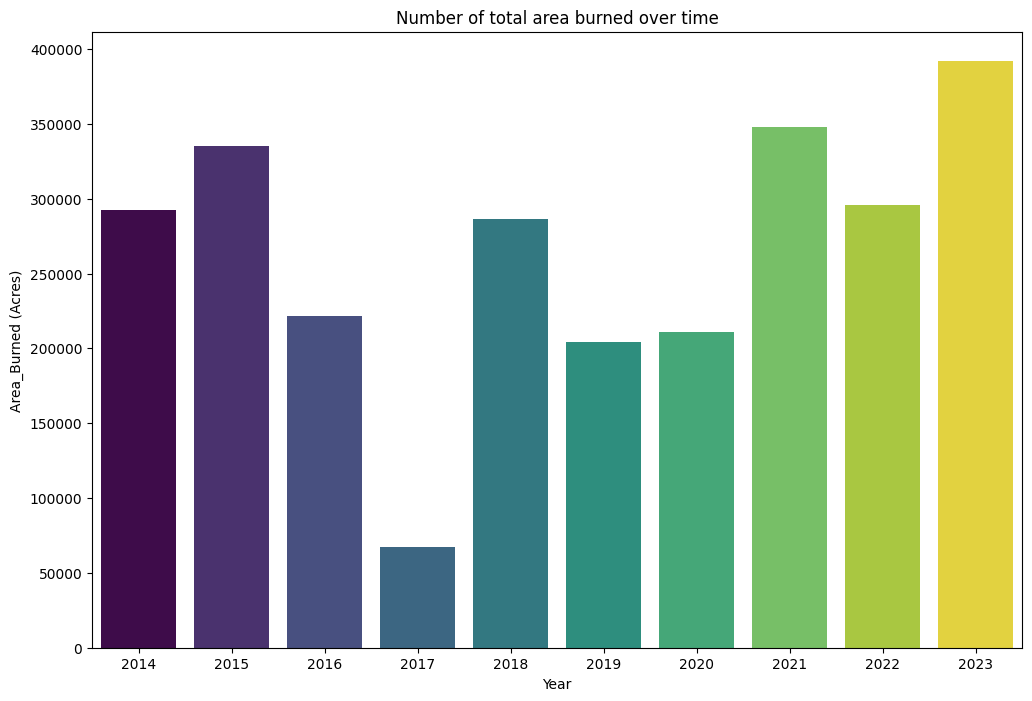

In [12]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Area_Burned (Acres)', data=data_set_grouped_by_Year_Sum_Area_Burned, hue='Year', palette='viridis', legend=False, errorbar=None)
plt.title('Number of total area burned over time')

<h3>Number of total injuries over time<h3>

In [13]:
data_set_grouped_by_Year_Sum_Injuries = data_set.groupby('Year')['Injuries'].sum().reset_index()
data_set_grouped_by_Year_Sum_Injuries

,Year,Injuries
0,2014,561
1,2015,255
2,2016,371
3,2017,174
4,2018,564
5,2019,356
6,2020,319
7,2021,555
8,2022,546
9,2023,503


Text(0.5, 1.0, 'Number of injuries over time')

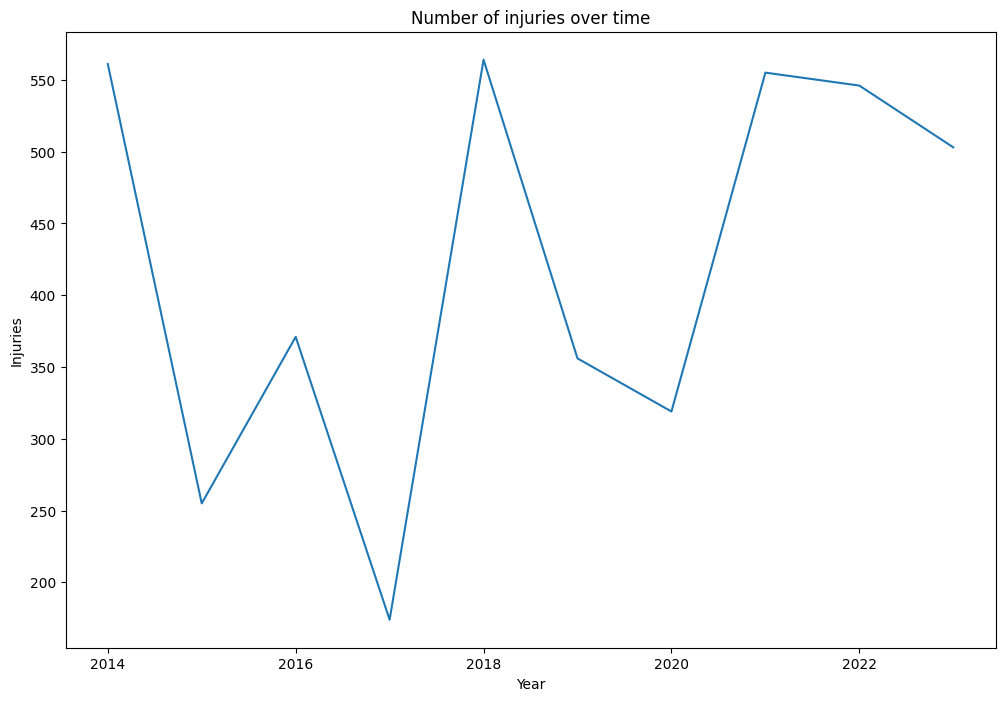

In [14]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Injuries', data=data_set_grouped_by_Year_Sum_Injuries, legend=False)
plt.title('Number of injuries over time')

<h3>Number of total Fatalities over time<h3>

In [15]:
data_set_grouped_by_Year_Fatalities = data_set.groupby('Year')['Fatalities'].sum().reset_index()
data_set_grouped_by_Year_Fatalities

,Year,Fatalities
0,2014,103
1,2015,61
2,2016,109
3,2017,46
4,2018,112
5,2019,77
6,2020,104
7,2021,131
8,2022,133
9,2023,117


Text(0.5, 1.0, 'Number of Fatalities over time')

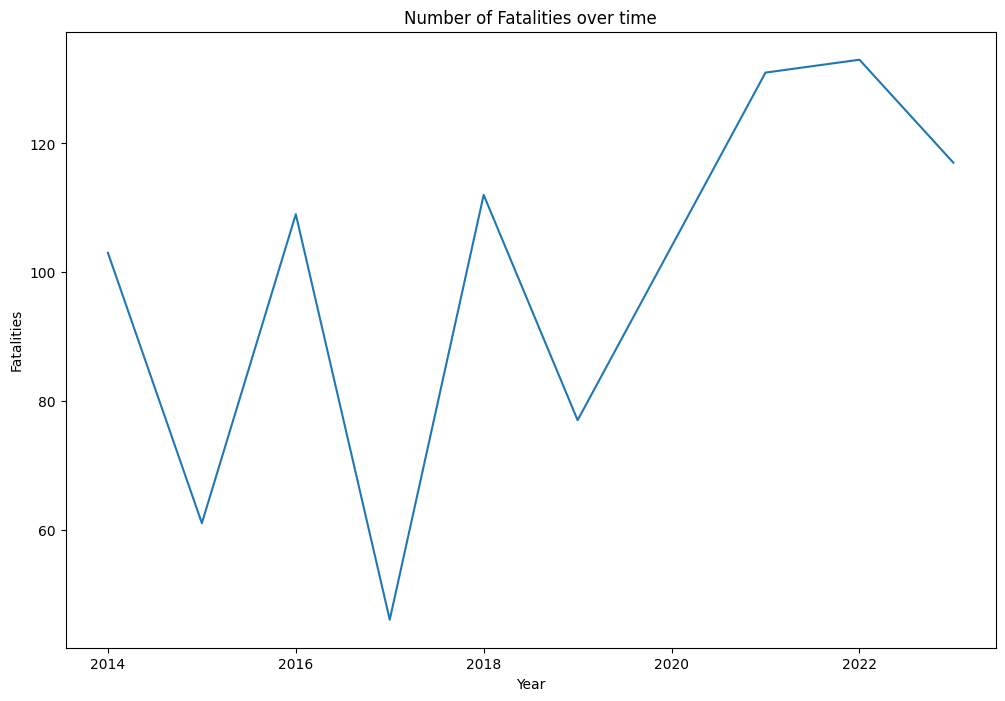

In [16]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Fatalities', data=data_set_grouped_by_Year_Fatalities, legend=False)
plt.title('Number of Fatalities over time')

<h3>Number of causes<h3>

In [17]:
cause_counts = data_set['Cause'].value_counts()
print(cause_counts)

Cause
Human Activity    38
Unknown           31
Lightning         31
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Fire Causes')

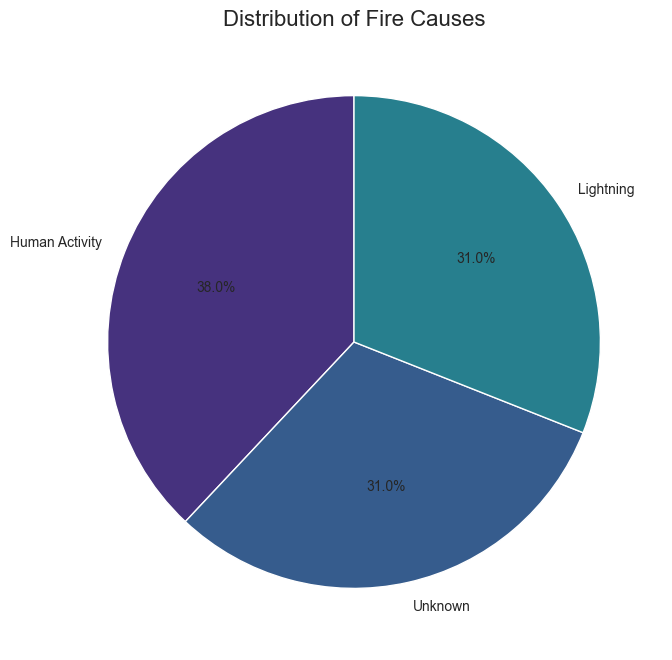

In [18]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
plt.pie(cause_counts, labels=cause_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))

plt.title('Distribution of Fire Causes', fontsize=16)

<h3>Number of total area Burned by location<h3>

In [19]:
data_set_grouped_by_Location_Sum_Area_Burned  = data_set.pivot_table(index='Location', values='Area_Burned (Acres)')
data_set_grouped_by_Location_Sum_Area_Burned

,Area_Burned (Acres)
Location,
Butte County,29250.454545
Los Angeles County,23923.714286
Mendocino County,30901.090909
Napa Valley,26614.500000
Orange County,31473.000000
Riverside County,27241.625000
San Diego County,22853.250000
Santa Barbara County,29796.166667
Shasta County,25423.071429


Text(0.5, 1.0, 'HeatMap - Avarege Area burned')

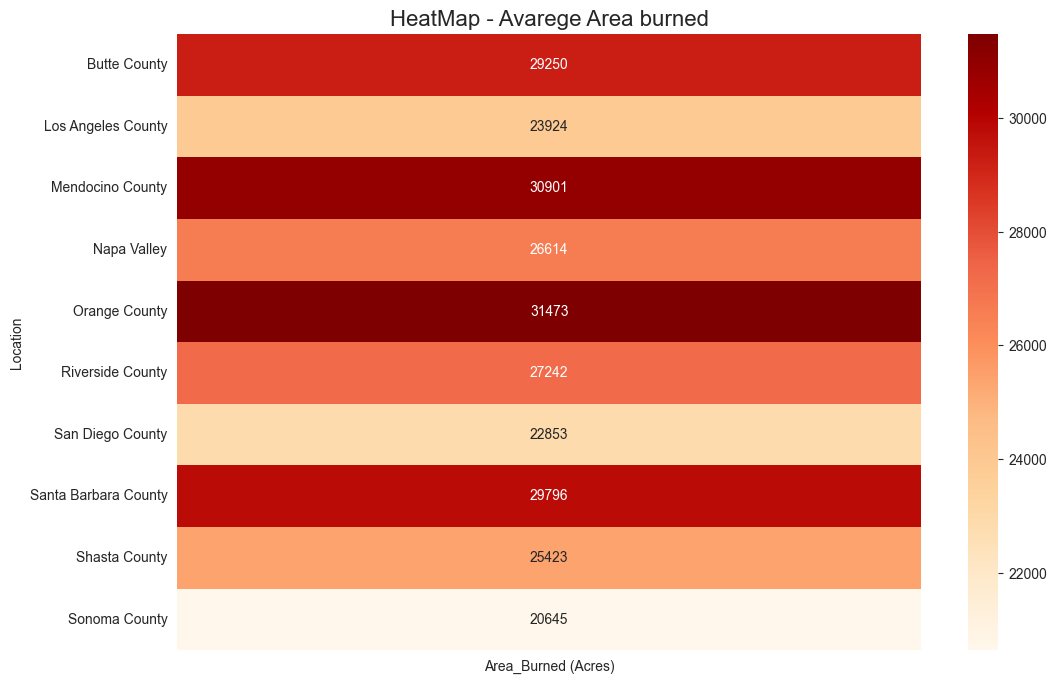

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_set_grouped_by_Location_Sum_Area_Burned    , annot=True, cmap='OrRd', fmt='.0f')
plt.title('HeatMap - Avarege Area burned', fontsize=16)

<h3>Number of total Estimated_Financial_Loss (Million $) over time<h3>

In [21]:
data_set_grouped_By_Year_Sum_Estimated_Financial_Loss= data_set.groupby('Year')['Estimated_Financial_Loss (Million $)'].sum().reset_index()
data_set_grouped_By_Year_Sum_Estimated_Financial_Loss

,Year,Estimated_Financial_Loss (Million $)
0,2014,22034.10
1,2015,20635.89
2,2016,22327.25
3,2017,13745.34
4,2018,30937.25
5,2019,23323.00
6,2020,20400.76
7,2021,37069.46
8,2022,26704.28
9,2023,22432.60


Text(0.5, 1.0, 'Estimated Financia Loss (Million $) over time')

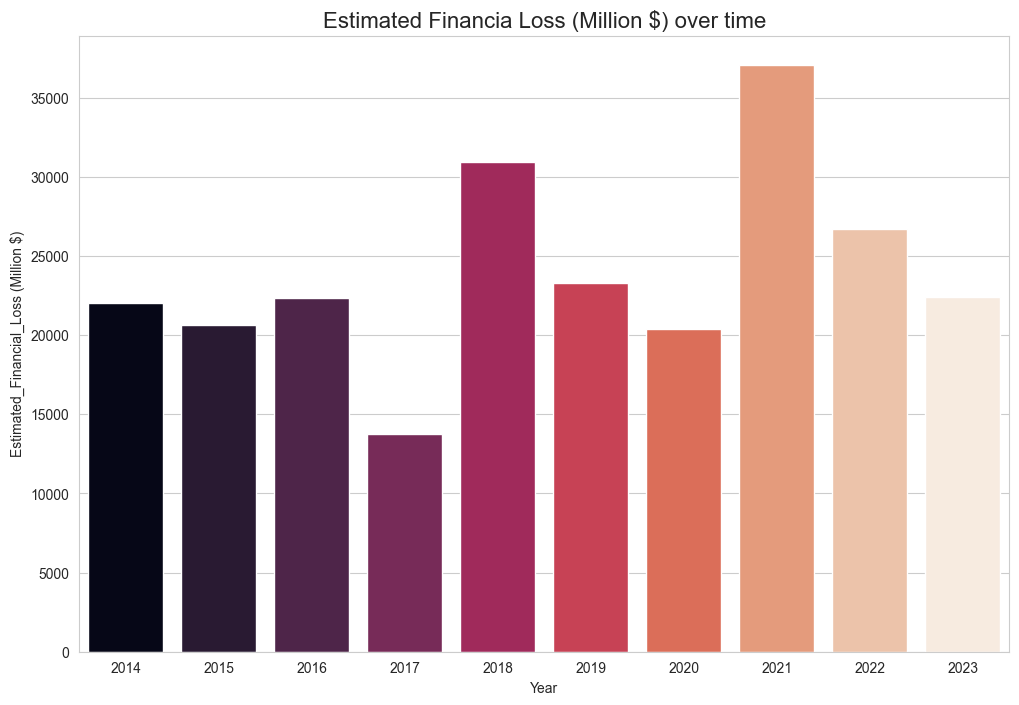

In [31]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Year',hue='Year',legend=False, y='Estimated_Financial_Loss (Million $)', data=data_set_grouped_By_Year_Sum_Estimated_Financial_Loss, palette='rocket')
plt.title('Estimated Financia Loss (Million $) over time', fontsize=16)

<h3>Correlation between variables <h3>

In [23]:
correlation_matrix = data_set[['Area_Burned (Acres)', 'Homes_Destroyed','Businesses_Destroyed',
                               'Vehicles_Damaged','Injuries','Fatalities','Estimated_Financial_Loss (Million $)']].corr()
correlation_matrix

,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $)
Area_Burned (Acres),1.000000,0.051915,0.028195,-0.136432,0.094843,0.050394,0.075187
Homes_Destroyed,0.051915,1.000000,0.113493,-0.073115,0.015270,-0.045863,0.046645
Businesses_Destroyed,0.028195,0.113493,1.000000,-0.075566,-0.103607,0.073564,-0.077990
Vehicles_Damaged,-0.136432,-0.073115,-0.075566,1.000000,0.119331,-0.177314,-0.024450
Injuries,0.094843,0.015270,-0.103607,0.119331,1.000000,-0.037908,0.079737
Fatalities,0.050394,-0.045863,0.073564,-0.177314,-0.037908,1.000000,0.184919
Estimated_Financial_Loss (Million $),0.075187,0.046645,-0.077990,-0.024450,0.079737,0.184919,1.000000


Text(0.5, 1.0, 'Correlation Between Damage Variables')

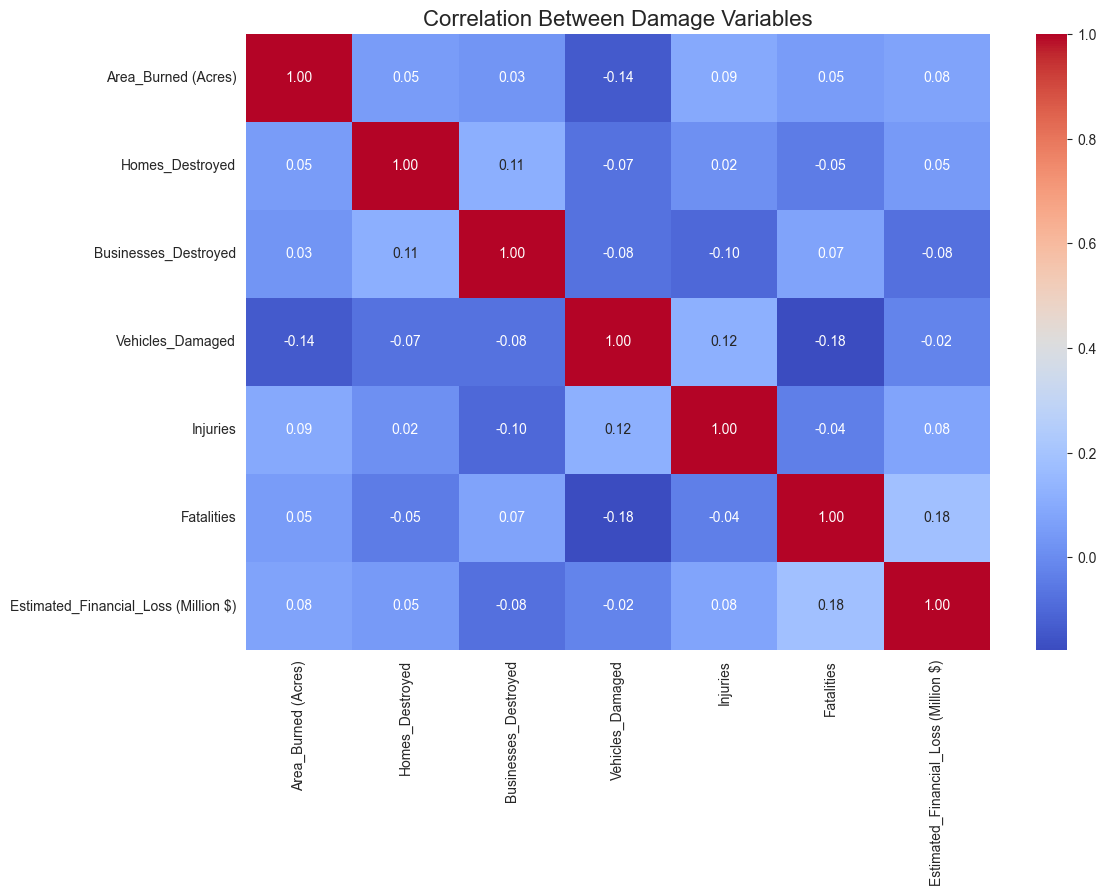

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Damage Variables', fontsize=16)

<h3>Number of total Estimated_Financial_Loss (Million $) by location<h3>

In [25]:
data_set_grouped_By_Location_Sum_Estimated_Financial_Loss= data_set.groupby('Location')['Estimated_Financial_Loss (Million $)'].sum().reset_index().sort_values('Estimated_Financial_Loss (Million $)')
data_set_grouped_By_Location_Sum_Estimated_Financial_Loss

,Location,Estimated_Financial_Loss (Million $)
1,Los Angeles County,16599.43
7,Santa Barbara County,17397.26
4,Orange County,19302.26
5,Riverside County,21662.94
3,Napa Valley,21946.82
9,Sonoma County,22501.82
6,San Diego County,22914.56
2,Mendocino County,23864.77
0,Butte County,36187.83
8,Shasta County,37232.24


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Los Angeles County'),
  Text(1, 0, 'Santa Barbara County'),
  Text(2, 0, 'Orange County'),
  Text(3, 0, 'Riverside County'),
  Text(4, 0, 'Napa Valley'),
  Text(5, 0, 'Sonoma County'),
  Text(6, 0, 'San Diego County'),
  Text(7, 0, 'Mendocino County'),
  Text(8, 0, 'Butte County'),
  Text(9, 0, 'Shasta County')])

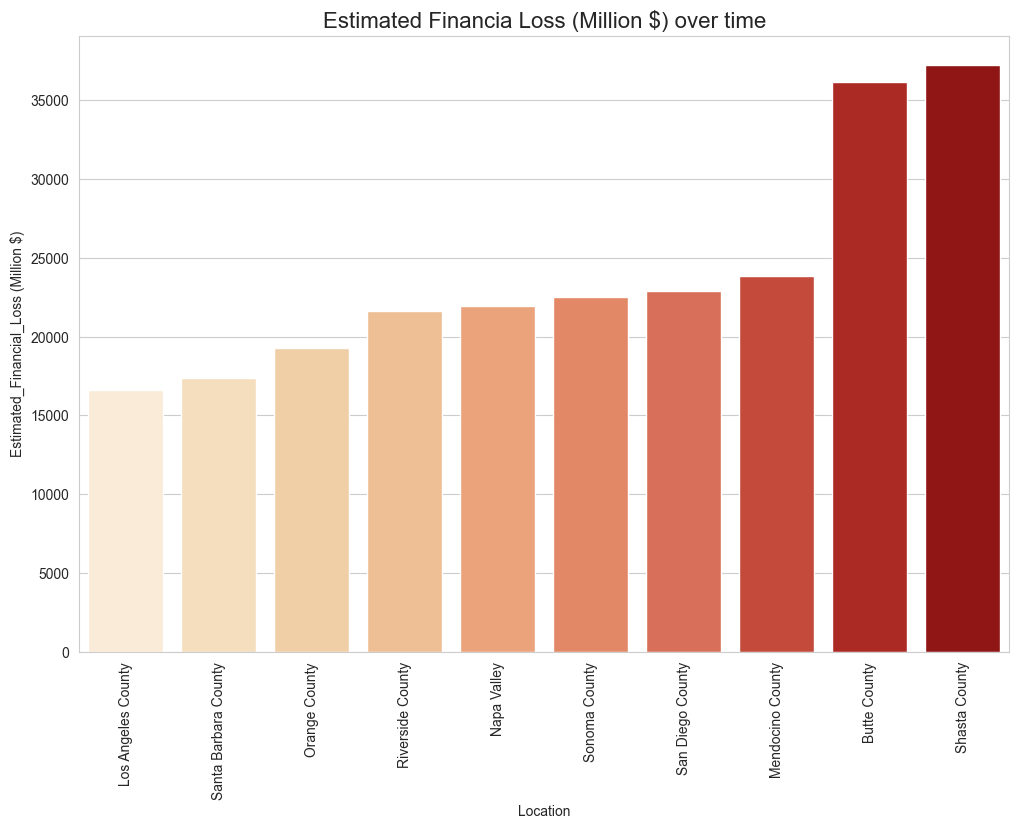

In [30]:
plt.figure(figsize=(12, 8))
sns.barplot(hue='Location',x = 'Location', y='Estimated_Financial_Loss (Million $)', data=data_set_grouped_By_Location_Sum_Estimated_Financial_Loss, palette='OrRd',legend=False)
plt.title('Estimated Financia Loss (Million $) over time', fontsize=16)
plt.xticks(rotation=90)

<h3>Number of cause by location<h3>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Butte County'),
  Text(1, 0, 'Sonoma County'),
  Text(2, 0, 'Los Angeles County'),
  Text(3, 0, 'San Diego County'),
  Text(4, 0, 'Shasta County'),
  Text(5, 0, 'Mendocino County'),
  Text(6, 0, 'Santa Barbara County'),
  Text(7, 0, 'Napa Valley'),
  Text(8, 0, 'Orange County'),
  Text(9, 0, 'Riverside County')])

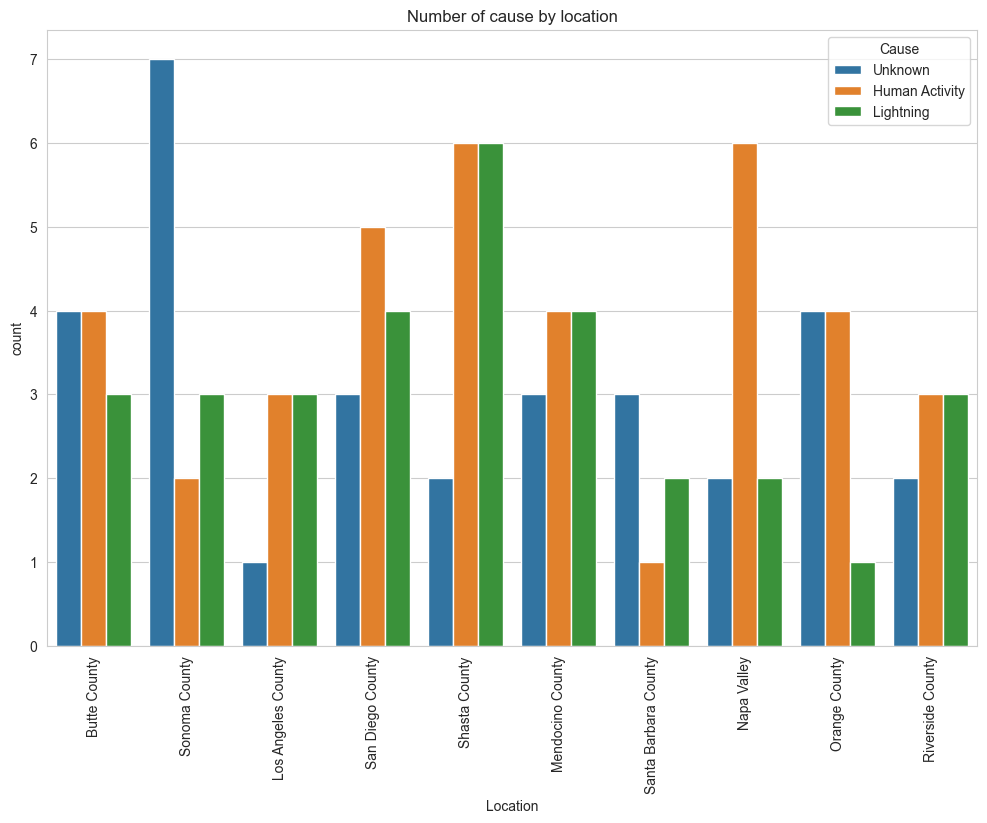

In [27]:
plt.figure(figsize=(12, 8))
sns.countplot(x = 'Location', hue = 'Cause',data=data_set)
plt.title('Number of cause by location')
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '2014'),
  Text(1, 0, '2015'),
  Text(2, 0, '2016'),
  Text(3, 0, '2017'),
  Text(4, 0, '2018'),
  Text(5, 0, '2019'),
  Text(6, 0, '2020'),
  Text(7, 0, '2021'),
  Text(8, 0, '2022'),
  Text(9, 0, '2023')])

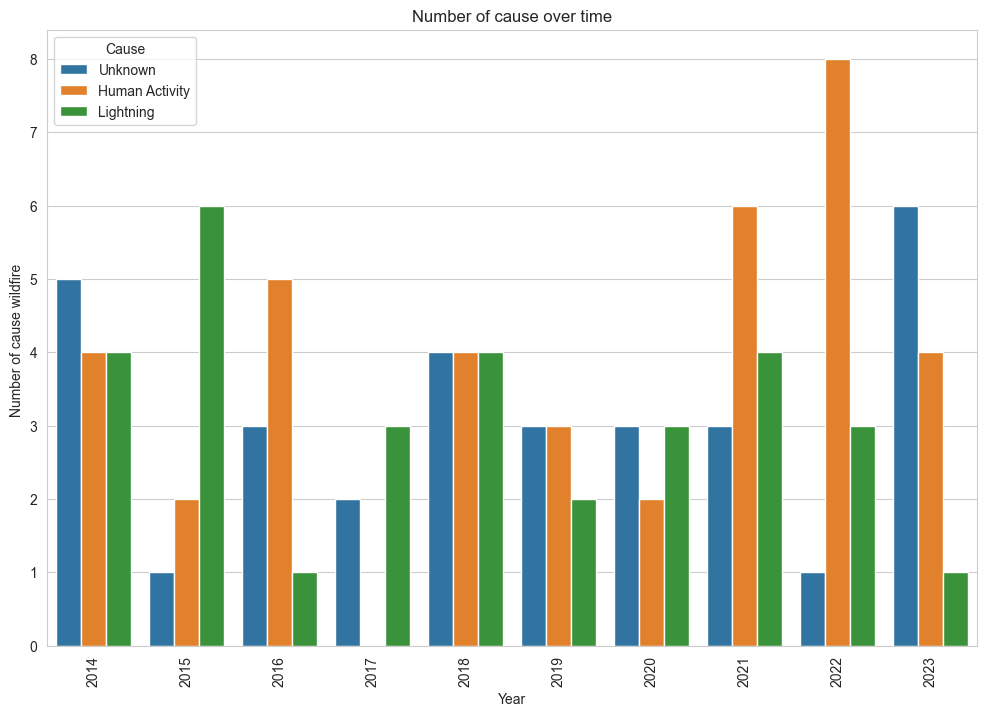

In [28]:
plt.figure(figsize=(12, 8))
sns.countplot(x = 'Year', hue = 'Cause',data=data_set)
plt.title('Number of cause over time')
plt.ylabel('Number of cause wildfire ')
plt.xticks(rotation=90)


<h1>Conclusions<h1>

- **Increase in Area Burned Over Time**: There has been a noticeable increase in the area burned by wildfires over the years.

- **Rise in Injuries Over Time**: The number of injuries caused by wildfires has also shown an upward trend.

- **Increase in Fatalities Over Time**: Fatalities resulting from wildfires have been on the rise.

- **Human Activity as the Leading Cause**: Human activity is the primary cause of wildfires.

- **Growing Financial Loss in Urban Areas**: Financial losses in cities due to wildfires have been increasing.

- **Moderate Positive Correlation Between Fatalities and Financial Loss**: There is a moderate positive correlation between the number of fatalities and the financial losses incurred.

- **Lightning and Human Activity as Main Causes Over Time and Across Locations**: Both lightning and human activity have consistently been the main causes of wildfires over time and in various locations.


